In [1]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

from statsmodels.graphics.api import qqplot
%matplotlib inline

**Loading Dataset into Python**

In [2]:
#Read the Dataset
f_birth_data=pd.read_csv("daily-total-female-births-CA.csv")

In [3]:
f_birth_data.head()

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


In [4]:
f_birth_data.tail()

,date,births
360,1959-12-27,37
361,1959-12-28,52
362,1959-12-29,48
363,1959-12-30,55
364,1959-12-31,50


In [8]:
f_birth_data = pd.read_csv('daily-total-female-births-CA.csv', index_col = [0], parse_dates = [0] )
#It will remove index value and parse dates Index value of date column is 0 and Take date column and assign it to index column

In [9]:
f_birth_data .head()

,births
date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


In [10]:
f_birth_data .tail()

,births
date,
1959-12-27,37
1959-12-28,52
1959-12-29,48
1959-12-30,55
1959-12-31,50


**Performing EDA(Exploratory Data Analysis)**

In [11]:
f_birth_data .info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 1959-01-01 to 1959-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   births  365 non-null    int64
dtypes: int64(1)
memory usage: 5.7 KB


In [12]:
f_birth_data .shape

(365, 1)

<Axes: xlabel='date'>

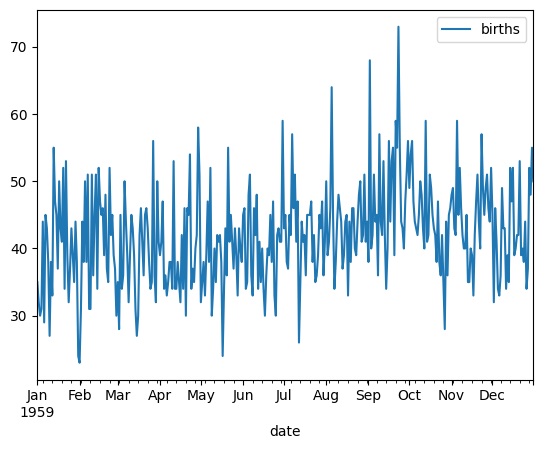

In [13]:
f_birth_data .plot()

Lots of Ups and down we will now smooth these curves so that we can understand it clearly

In [14]:
#Applying Smoothing
#For smooth curve we need to find moving average
moving_avg_birth=f_birth_data.rolling(window = 20).mean() #window=20 means it takes 20 data points and give mean of them.

In [15]:
moving_avg_birth   #first 19 birth will be NaN because window size is 20

,births
date,
1959-01-01,NaN
1959-01-02,NaN
1959-01-03,NaN
1959-01-04,NaN
1959-01-05,NaN
...,...
1959-12-27,42.10
1959-12-28,42.25
1959-12-29,42.50


In [20]:
moving_avg_birth  .head(20) #can see in this

,births
date,
1959-01-01,NaN
1959-01-02,NaN
1959-01-03,NaN
1959-01-04,NaN
1959-01-05,NaN
1959-01-06,NaN
1959-01-07,NaN
1959-01-08,NaN
1959-01-09,NaN


<Axes: xlabel='date'>

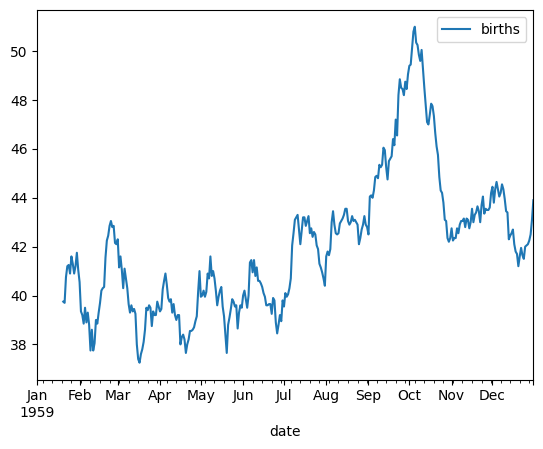

In [17]:
moving_avg_birth.plot()

**Now We can clearly understand After Smoothing**

<Axes: xlabel='date'>

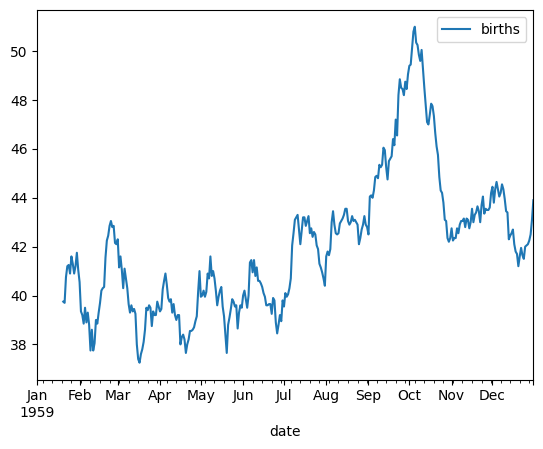

In [21]:
moving_avg_birth.plot()


**Durbin watson** : - <2 Positively correlated and >3 but<4 is Negatively correlated if 2 then data is independent or no correlation

In [22]:
#Test for correlation

sm.stats.durbin_watson(f_birth_data)

array([0.04624491])

Output is <2 i.e 0 means its Positively correlated

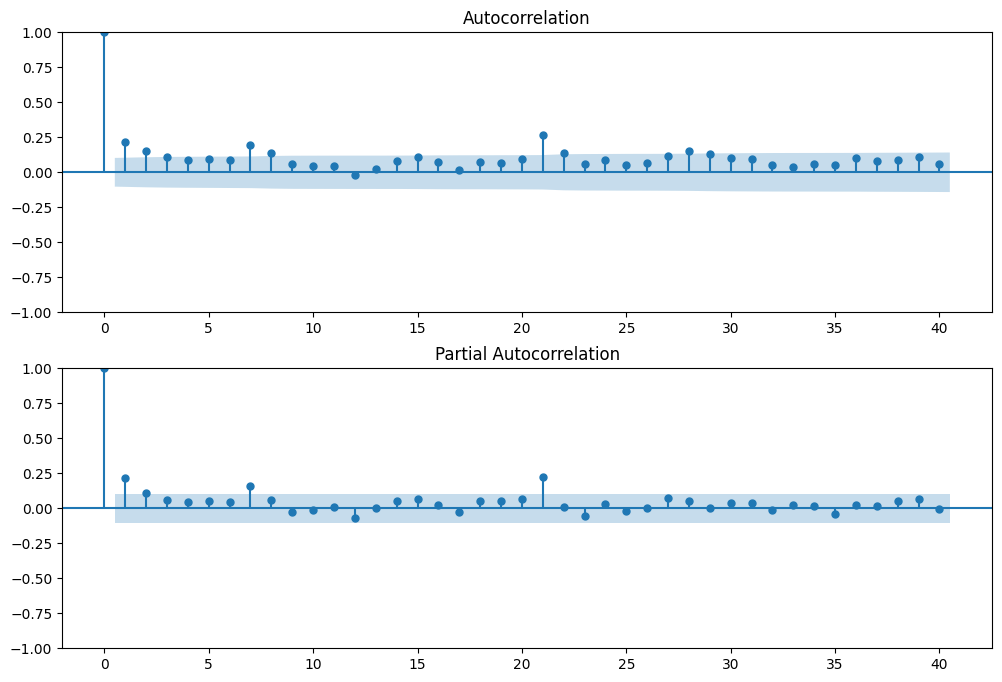

In [24]:
fig=plt.figure(figsize=(12,8))

#Now we will create subplots- contains 211,212 and etc. means(no of column,no. of rows,my position)
# for axis 1
ax1=fig.add_subplot(211)
fig=sm.graphics.tsa.plot_acf(f_birth_data,lags=40,ax=ax1) #ACF CONCEPT

ax2=fig.add_subplot(212)
fig=sm.graphics.tsa.plot_pacf(f_birth_data,lags=40,ax=ax2) #PACF CONCEPT

IN ACF Only 1 Data is negatively related and In PACF Some Data i.e more than 3 are negatively correlated. **But Most of them are positively Related** *and some are No correlated also*

**Split Dataset into TRAIN and TEST**

In [25]:
train=f_birth_data[0:320] #for training we have 320 data and Remaining for test
test=f_birth_data[320:] #320 tll last

In [26]:
from  statsmodels.tsa.arima_model import ARIMA

In [27]:
arima=sm.tsa.ARIMA(train,order=(1,2,3))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [29]:
#Fit the model
model=arima.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [30]:
#CHECK AIC of model
# AIC checks weather our model is good or not
model.aic


2170.2412176485254

**After fitting we will do prediction**

In [35]:
pred=model.forecast(steps=45)
#We have 365 days out of that we take 320 days for training 45 left we will use that for forecasting

In [36]:
pred[0] #predict for 1 data out of 45

42.69119419238504

**Checking the accuracy**

In [42]:
from sklearn.metrics import mean_squared_error

mean_squared_error(test,pred)

43.16698880768503

In [44]:
np.sqrt(mean_squared_error(test,pred)) #error which we arre getting

6.570158963654154

# **Different Models in Time Series Analysis**

In [46]:
# ARIMA(Auto Regressive),SARIMA(Seasonlity),Moving Average and etc.
# We performed ARIMA now we will perform SARIMA model
# Arima had given us 43% Accuracy lets see how much accuracy SARIMA Will give.
# The model which gives best accuracy we choose it simple thing.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


SARIMA RMSE: 9.4569772780013


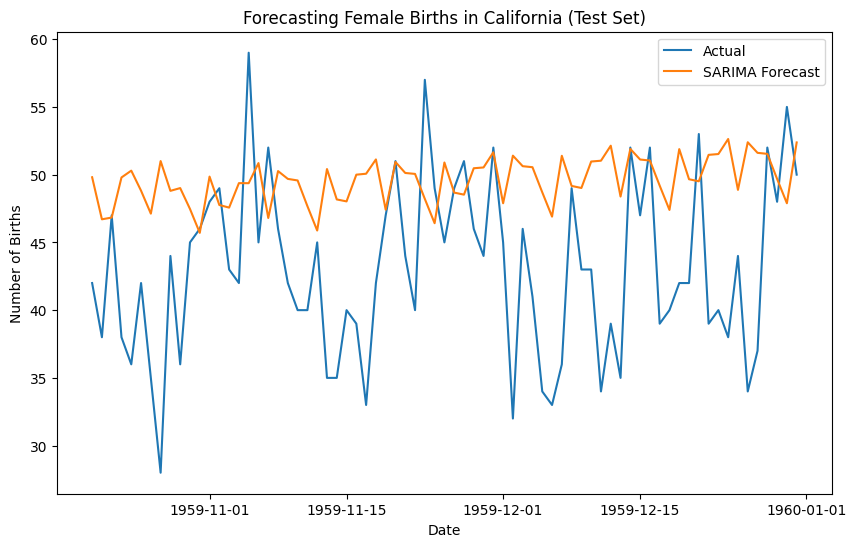

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

# Load the dataset
data_url = "daily-total-female-births-CA.csv"
df = pd.read_csv(data_url, header=0, index_col=0, parse_dates=True)

# Train-test split
train_size = int(len(df) * 0.8)
train, test = df[:train_size], df[train_size:]

# SARIMA model
order = (1, 1, 1)  # (p, d, q)
seasonal_order = (1, 1, 1, 12)  # (P, D, Q, S)
model = SARIMAX(train, order=order, seasonal_order=seasonal_order)
model_fit = model.fit(disp=False)

# Forecast
sarima_forecast = model_fit.forecast(steps=len(test))

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test, sarima_forecast))
print("SARIMA RMSE:", rmse)

# Plot actual vs. forecasted values
plt.figure(figsize=(10, 6))
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, sarima_forecast, label='SARIMA Forecast')
plt.title('Forecasting Female Births in California (Test Set)')
plt.xlabel('Date')
plt.ylabel('Number of Births')
plt.legend()
plt.show()


Sarima Model has given us 94% accuracy which is far accurate than ARIMA

# How to Choose the "best" model:
1. If your data has clear seasonal patterns, SARIMA may be a good choice as it explicitly models seasonality.
2. If your data has trend but no clear seasonality, ARIMA might be more appropriate.
3. Moving average can be a good baseline model or used for simple smoothing tasks, but it's less suitable for forecasting long-term trends or capturing seasonality.

In [48]:
# In This project, I Choosed SARIMA model because of Seasonality in Dataset and SARIMA also has given Highest accuracy in this project